In [36]:
import import_all
from fbprophet import Prophet
evict = import_all.evict
police = import_all.police
pd = import_all.pd

# Forecasting Eviction Data 
---

## Overall Evictions
Let's see if we can forecast evictions over the next year. 


In [59]:
#First, set up our data to groupby month, and count evictions per month
evict.date = pd.to_datetime(evict.date)
overall_evict_data = evict.set_index('date').groupby(pd.TimeGrouper(freq='M'))['Address'].count()
overall_evict_data = overall_evict_data.reset_index()
overall_evict_data.head()

,date,Address
0,1997-01-31,152
1,1997-02-28,122
2,1997-03-31,186
3,1997-04-30,211
4,1997-05-31,183


In [66]:
#Transform this to match the necessary "ds" and "y" for prophet
#Also log transform the y 
overall_evict_data = overall_evict_data.rename(columns={'date':'ds', 'Address': 'y'})
overall_evict_data.y = import_all.np.log(overall_evict_data.y)
overall_evict_data.to_csv('/data/leils/prophet_overall_evict.csv', index=False, index_label=False)
overall_evict_data.head()

,ds,y
0,1997-01-31,1.614203
1,1997-02-28,1.569453
2,1997-03-31,1.653598
3,1997-04-30,1.677444
4,1997-05-31,1.650481


In [61]:
#fit Prophet model 
m=Prophet()
m.fit(overall_evict_data)

In [62]:
#Create a future model, for testing
future = m.make_future_dataframe(periods=120, freq='m')
future.tail()

,ds
355,2026-08-31
356,2026-09-30
357,2026-10-31
358,2026-11-30
359,2026-12-31


In [63]:
#Let's predict future trends now! 
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
355,2026-08-31,6.133397,5.720081,6.515917
356,2026-09-30,6.148029,5.724843,6.542330
357,2026-10-31,6.139009,5.715194,6.519627
358,2026-11-30,5.932358,5.524944,6.336725
359,2026-12-31,5.947904,5.530594,6.359042


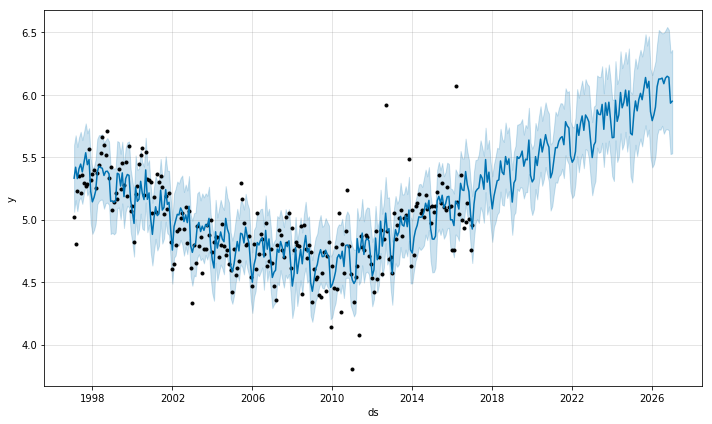

In [64]:
m.plot(forecast)

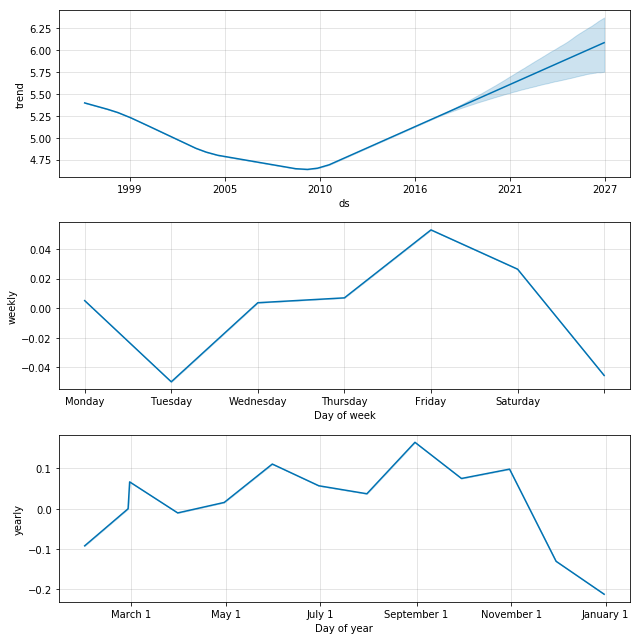

In [65]:
m.plot_components(forecast)

Here we see a couple of distinct things: a yearly trend of high evictions in the middle of the year and low evictions near the start and end, as well as a tendency for evictions to occur on Fridays. 

Additionally, the algorithm forcasts an upward trend in evictions overall - this on its own may or may not be true, as it is likely an extension of the slope we see from 2010-present. 

## Crime in the Mission District 

Can we predict the future rate of evictions in the Mission district, similar to how we predicted eviction rates above? 

In [9]:
police.head()

,Category,PdDistrict,Date
0,NON-CRIMINAL,mission,2015-01-19
1,LARCENY/THEFT,mission,2015-02-01
2,DRUG/NARCOTIC,mission,2015-02-01
3,DRUG/NARCOTIC,mission,2015-02-01
4,WARRANTS,mission,2015-02-01


In [25]:
#Create the input dataset 
police['date'] = pd.to_datetime(police.Date)
overall_police_data = police.set_index('date').groupby(pd.TimeGrouper(freq='M'))['Category'].count()
overall_police_data = overall_police_data.reset_index()
overall_police_data = overall_police_data.rename(columns={'date':'ds', 'Category':'y'})
overall_police_data.to_csv('/data/leils/prophet_overall_police.csv', index=False, index_label=False)
overall_police_data.head()
# police.dtypes

,ds,y
0,2003-01-31,1882
1,2003-02-28,1736
2,2003-03-31,1801
3,2003-04-30,1769
4,2003-05-31,1716


In [26]:
model = Prophet()
model.fit(overall_police_data)

In [33]:
police_future = model.make_future_dataframe(periods=50, freq='m')
police_future.tail()

,ds
216,2021-01-31
217,2021-02-28
218,2021-03-31
219,2021-04-30
220,2021-05-31


In [34]:
police_forecast = model.predict(police_future)
police_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
216,2021-01-31,1634.448965,1445.785161,1809.115479
217,2021-02-28,1467.691721,1285.063010,1668.592848
218,2021-03-31,1531.240305,1347.675502,1723.969569
219,2021-04-30,1532.677010,1331.908763,1715.219195
220,2021-05-31,1626.000657,1431.292345,1812.027137


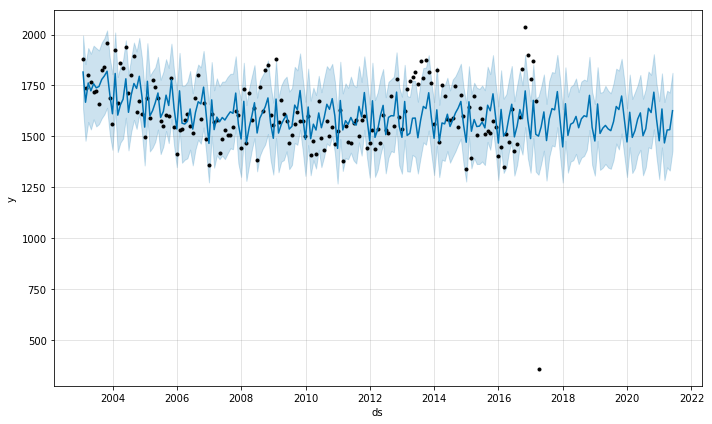

In [35]:
model.plot(police_forecast)

As you can see, this isn't a useable model for prediction. The data seems to be farther spread than the model. We can't include this in conclusions. 